# **Particle Swarm Optimization**

Hoje a gente vai aprender a otimizar funções utilizando o algoritmo **Particle Swarm Optimization** (PSO)

## **Motivação**

Quando se utiliza algoritmos de machine learning, sempre se tem hiperparâmetros associados, e é um desafio saber se os hiperparâmetros usados para determinadas aplicações foi feito de maneira ótima.

E, na verdade, não existe um algoritmo melhor, aquele que vai sobressair em todas as ocasiões em relação aos outros, então tem-se o desafio de, além de escolher o algoritmo adequado, escolher os hiperparâmetros adequados, normalmente se chama esse desafio de teorema **No Free Lunch**.

Sendo assim, é importante que a gente sempre teste vários algoritmos, e que a gente consiga tirar o máximo deles, então ter a possibilidade de otimizar hiperparâmetros é algo extremamente útil na área, e um dos algoritmos utilizados para isso é o PSO.

## **Historinha**

Proposto por Kennedy e Eberhart em 1995 [neste paper](https://ieeexplore.ieee.org/document/488968) (**leia**), o PSO é inspirado pelo comportamento social e cooperativo exibido por várias espécies de forma a realizar as suas necessidades no espaço de busca. Além disso, PSO é uma meta-heurística, pois realiza poucas ou nenhumas premissas sobre o problema que está a ser otimizado e pode procurar soluções candidatas em espaços de grandes dimensões. No entanto, algumas meta-heurísticas como PSO não garantem que uma solução ideal seja encontrada. 

Em termos gerais, o algoritmo guia-se por experiência pessoal (**Pbest**), experiência geral (**Gbest**) e o movimento das partículas atual para decidir as posições seguintes no espaço de pesquisa. O PSO resolve um problema criando uma população de soluções candidatas, também conhecidas como partículas, e movendo estas partículas em torno do espaço de pesquisa, de acordo com fórmulas matemáticas simples sobre a posição e velocidade da partícula. O movimento de cada partícula é influenciado pela sua posição do local mais conhecida, mas, também é guiado em direção às posições mais conhecidas do espaço de pesquisa, que são atualizadas como posições melhores quando encontradas por outras partículas. Isto é espectável, quando o intuito é mover o enxame em direção da melhor solução.

Diferente de algoritmos de otimização que se baseiam no uso de gradiente, como o algoritmo de Newton-Raphson, o PSO não requer nem que a função seja diferenciável (essa é a sua grande vantagem), basta que ela seja continua, e também não requer linearidade.

## **O Algoritmo**

Imagine que você tenha um enxame de $n$ particulas, onde cada particula $i$, com $i=1, \ldots, n$ é definida pela sua posição instantânea  $x_i(t)$ e sua velocidade instantânea $v_i(t)$. O vetor velocidade para o qual as partículas devem seguir é uma ponderação da experiência pessoal, ou seja, do melhor resultado que aquela partícula experienciou, e da experiência global, ou seja, do melhor resultado que o enxame todo experienciou, como mostrado na figura abaixo:

<img src="pso1.png" alt="Drawing" style="width: 800px;"/>

Sendo assim, a expressão para a atualização da posição e da velocidade de cada particula é:

$$v_{i+1}(t) = wv_i(t) + c_1r_1(Pbest_i(t) - x_i(t)) + c_2r_2(Gbest(t) - x_i(t))$$

$$x_{i+1}(t) = x_i(t) + v_{i+1}(t)$$

* A primeira componente, $wv_i(t)$ é chamada de **componente inercial**, e o $w$ é chamado de **constante inercial**
* A segunda componente, $c_1r_1(Pbest_i(t) - x_i(t))$ é chamada de **componente cognitiva**
* A terceira componente, $c_2r_2(Gbest(t) - x_i(t))$ é chamada de **componente social**
* As constantes $c_1$ e $c_2$ são chamadas de **coeficientes de aceleração**
* As variáveis $r_1$ e $r_2$ são valores aleatórios **uniformemente** distribúidos no intervalo $(0,1)$

Lembre-se que além de escolher as variáveis citadas nos bullet points acima, é importante definir um **número de iterações máximo** para o PSO, bem como a **quantidade de indivíduos** que haverá na população. A critério de convergência, normalmente se coloca também o quanto cada passo variou no custo, ou seja, se variou pouco, considera-se que o algoritmo chegou no ponto ótimo.

## **Implementação**

Recomendo que se faça uma implementação from scratch para aprender melhor sobre o algoritmo e também para que se tenha mais controle sobre ele, e ai brincando com a implementação se acaba aprendendo mais

Nesse notebook, vou utilizar a biblioteca [pyswarm](https://pythonhosted.org/pyswarm/) a título de mostrar o funcionamento, que traz algumas limitações, mas a ideia é uma exposição rápida.

Primeiramente, vamos importar as bibliotecas usadas

In [116]:
from pyswarm import pso
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Função sem restrições**

Começaremos querendo encontrar o mínimo da função $f(x) = x^2$, sem nenhuma restrição, portanto, definimos:

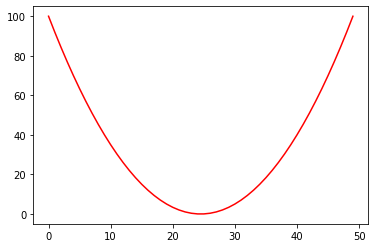

In [132]:
def squared(x):
    return x**2

lb = [-10]
ub = [10]

t = np.linspace(lb, ub)
plt.plot(squared(t), color = 'red')
plt.show()

Agora, aplicando no PSO, tem-se:

In [133]:
xopt, fopt = pso(squared, lb, ub, debug = 1)
print('O x ótimo é {}, retornando um valor de f(x) = {}' .format(xopt, fopt))

No constraints given.
Best after iteration 1: [0.04891517] 0.0023926943062295815
Best after iteration 2: [0.04891517] 0.0023926943062295815
Best after iteration 3: [0.04891517] 0.0023926943062295815
Best after iteration 4: [0.04891517] 0.0023926943062295815
New best for swarm at iteration 5: [-0.03599491] [0.00129563]
New best for swarm at iteration 5: [-0.0113706] [0.00012929]
Best after iteration 5: [-0.0113706] [0.00012929]
Best after iteration 6: [-0.0113706] [0.00012929]
New best for swarm at iteration 7: [0.00780665] [6.09438281e-05]
Best after iteration 7: [0.00780665] [6.09438281e-05]
Best after iteration 8: [0.00780665] [6.09438281e-05]
Best after iteration 9: [0.00780665] [6.09438281e-05]
New best for swarm at iteration 10: [-0.00597857] [3.57433299e-05]
New best for swarm at iteration 10: [0.0051094] [2.61059461e-05]
Best after iteration 10: [0.0051094] [2.61059461e-05]
Best after iteration 11: [0.0051094] [2.61059461e-05]
New best for swarm at iteration 12: [-0.00388351] [1

### **Função com restrições**

Agora, queremos encontrar o mínimo da função $f(x) = x$, com $x\geq 0$, portanto, definimos:

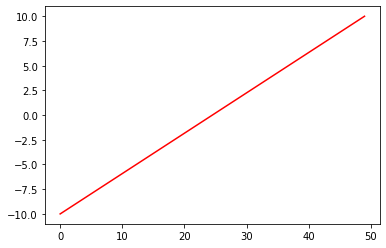

In [119]:
def line(x):
    return x

lb = [-10]
ub = [10]

def con(x):
    return [x]

t = np.linspace(lb, ub)
plt.plot(line(t), color = 'red')
plt.show()

In [120]:
xopt, fopt = pso(line, lb, ub, debug = 1, f_ieqcons=con )
print('O x ótimo é {}, retornando um valor de f(x) = {}' .format(xopt, fopt))

Single constraint function given in f_ieqcons
New best for swarm at iteration 1: [0.21506206] [0.21506206]
Best after iteration 1: [0.21506206] [0.21506206]
Best after iteration 2: [0.21506206] [-1.13011866]
Best after iteration 3: [0.21506206] [-0.75213214]
Best after iteration 4: [0.21506206] [-0.47056534]
Best after iteration 5: [0.21506206] [-0.08493264]
New best for swarm at iteration 6: [0.25665038] [0.25665038]
Best after iteration 6: [0.25665038] [0.25665038]
New best for swarm at iteration 7: [0.20157758] [0.20157758]
New best for swarm at iteration 7: [0.03311602] [0.03311602]
Best after iteration 7: [0.03311602] [0.03311602]
New best for swarm at iteration 8: [0.0147587] [0.0147587]
Best after iteration 8: [0.0147587] [0.0147587]
New best for swarm at iteration 9: [0.00044969] [0.00044969]
Best after iteration 9: [0.00044969] [0.00044969]
Best after iteration 10: [0.00044969] [-0.18573412]
Best after iteration 11: [0.00044969] [-0.14809943]
Best after iteration 12: [0.000449

### **Um problema mais difícil**

Queremos agora resolver o seguinte problema:

\begin{array}{ll}
    \mbox{minimizar}   & x_1^4 - 2x_2x_1^2 + x_1^2 - 2x_1 + 5\\
    \mbox{sujeito a} & -(x_1 + 0.25)^2 + 0.75x_2 \geq 0 \\
\end{array}

In [126]:
def dificil(x):
    x1 = x[0]
    x2 = x[1]
    return x1**4 - 2*x2*x1**2 + x2**2 + x1**2 - 2*x1 + 5

def con(x):
    x1 = x[0]
    x2 = x[1]
    return [-(x1 + 0.25)**2 + 0.75*x2]

lb = [-20, -20]
ub = [20, 20]

xopt, fopt = pso(dificil, lb, ub, f_ieqcons=con, debug = 1)

# Optimum should be around x=[0.5, 0.76] with dificil(x)=4.5 and con(x)=0

Single constraint function given in f_ieqcons
Best after iteration 1: [-0.26881316  0.37233954] 5.6999342503859545
Best after iteration 2: [-0.26881316  0.37233954] 5.6999342503859545
Best after iteration 3: [-0.26881316  0.37233954] 5.6999342503859545
Best after iteration 4: [-0.26881316  0.37233954] 5.6999342503859545
Best after iteration 5: [-0.26881316  0.37233954] 5.6999342503859545
Best after iteration 6: [-0.26881316  0.37233954] 5.6999342503859545
Best after iteration 7: [-0.26881316  0.37233954] 5.6999342503859545
New best for swarm at iteration 8: [0.40206887 0.6958766 ] 4.6429096781095165
Best after iteration 8: [0.40206887 0.6958766 ] 4.6429096781095165
Best after iteration 9: [0.40206887 0.6958766 ] 4.6429096781095165
New best for swarm at iteration 10: [0.51163937 0.84367615] 4.577105237060527
Best after iteration 10: [0.51163937 0.84367615] 4.577105237060527
Best after iteration 11: [0.51163937 0.84367615] 4.577105237060527
Best after iteration 12: [0.51163937 0.84367615

In [127]:
print('O x ótimo é {}, retornando um valor de f(x) = {}' .format(xopt, fopt))

O x ótimo é [0.50383223 0.75768404], retornando um valor de f(x) = 4.500034310978086


### **Um problema divertido**

Suponha que dado um quadrado de lado unitário, queira se encontrar o ponto tal que a soma das distâncias pros vértices do quadrado seja mínima, qual é a coordenada desse ponto?

<img src="code.png" alt="Drawing" style="width: 400px;"/>

As coordenadas dos vértices são $P_1 = (0,0)$, $P_2 = (0,1)$, $P_3 = (1,0)$ e $P_4 = (1,1)$

Logo, usando que a coordenada do ponto ótimo é $P^\star = (x,y)$, tem-se nossa função objetivo:

$$
J = \sqrt{(x-0)^2 + (y-0)^2} + \sqrt{(x-0)^2 + (y-1)^2} + \sqrt{(x-1)^2 + (y-0)^2} + \sqrt{(x-1)^2 + (y-1)^2}
$$

Vamo pro codigo!

In [128]:
def quadrado(x):
    x1 = x[0]
    x2 = x[1]
    return np.sqrt((x1-0)**2 + (x2-0)**2) + np.sqrt((x1-0)**2 + (x2-1)**2) + np.sqrt((x1-1)**2 + (x2-0)**2) + np.sqrt((x1-1)**2 + (x2-1)**2)

lb = [-20, -20]
ub = [20, 20]

xopt, fopt = pso(quadrado, lb, ub, debug = 1)

No constraints given.
New best for swarm at iteration 1: [0.51095036 0.35130995] 2.8603627032018224
Best after iteration 1: [0.51095036 0.35130995] 2.8603627032018224
Best after iteration 2: [0.51095036 0.35130995] 2.8603627032018224
Best after iteration 3: [0.51095036 0.35130995] 2.8603627032018224
Best after iteration 4: [0.51095036 0.35130995] 2.8603627032018224
Best after iteration 5: [0.51095036 0.35130995] 2.8603627032018224
New best for swarm at iteration 6: [0.52320564 0.51338919] 2.8294420722176583
Best after iteration 6: [0.52320564 0.51338919] 2.8294420722176583
Best after iteration 7: [0.52320564 0.51338919] 2.8294420722176583
Best after iteration 8: [0.52320564 0.51338919] 2.8294420722176583
Best after iteration 9: [0.52320564 0.51338919] 2.8294420722176583
Best after iteration 10: [0.52320564 0.51338919] 2.8294420722176583
Best after iteration 11: [0.52320564 0.51338919] 2.8294420722176583
Best after iteration 12: [0.52320564 0.51338919] 2.8294420722176583
New best for sw

In [129]:
print('O ponto ótimo é {}, retornando um valor de J = {}' .format(xopt, fopt))

O ponto ótimo é [0.50021178 0.50001574], retornando um valor de J = 2.8284271885239276
